<center><h1> TF IDF and Lemmatization </h1></center>

# 1. Information

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.  
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.  
For more dataset information, please go through the following link,  
http://ai.stanford.edu/~amaas/data/sentiment/  

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

## 2.2 Import data

In [2]:
data=pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
data.tail(5)

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


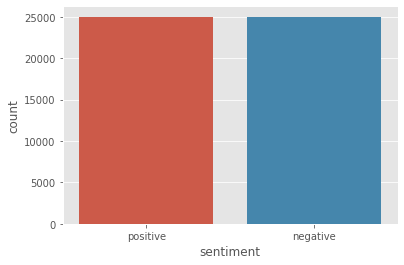

In [7]:
sns.countplot(x='sentiment',data=data, orient='v')

## 3 Data Preprocessing

## 3.1 Import packages

In [8]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

## 3.2 Stemming

In [9]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [10]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
data_Stemmer(data.review[0])

"one review mention watch 1 oz episod hooked. they right, exact happen me.<br /><br />the first thing struck oz brutal unflinch scene violence, set right word go. trust me, show faint heart timid. this show pull punch regard drugs, sex violence. its hardcore, classic use word.<br /><br />it call oz nicknam given oswald maximum secur state penitentary. it focus main emerald city, experiment section prison cell glass front face inwards, privaci high agenda. em citi home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgi deal shadi agreement never far away.<br /><br />i would say main appeal show due fact goe show dare. forget pretti pictur paint mainstream audiences, forget charm, forget romance...oz mess around. the first episod i ever saw struck nasti surreal, i say i readi it, i watch more, i develop tast oz, got accustom high level graphic violence. not violence, injustic (crook guard who'll sold nickel, inmat who'll kill or

In [12]:
data.review = data.review.apply(lambda x: data_Stemmer(x))

# 4 Machine learning 

## 4.1 Import packages

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [14]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index = [i for i in titles],
                      columns = [i for i in titles])
    plt.figure(figsize = (7,7))
    sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.title(title);

In [15]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

## 4.2 Split Train Test Data

In [16]:
X = data.review
y = data.sentiment.apply(lambda x: 0 if (x=='negative') else 1)
titles = ['positive', 'negative']

In [17]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

## 4.3 TF-IDF Transform

In [18]:
tf_vectorizer = TfidfVectorizer(stop_words=stop,
                                ngram_range = (1, 2) ,
                                min_df      = 0.00004, 
                                max_df      = 0.5    ,
                                norm        = None    )

In [19]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((35000, 487626), (15000, 487626))

In [20]:
vocabular = list(tf_vectorizer.vocabulary_.keys())

In [21]:
len(vocabular)

487626

In [22]:
vocabular[100:110]

['stori get',
 'get anoth',
 'ppv',
 'like',
 'wrestlemania',
 'xx',
 '14',
 'year',
 'later',
 'wwe']

## 4.4 Log Regression Model

In [23]:
log_reg_cv = LogisticRegression(
                                    C           = 100 ,
                                    penalty     ='l1' ,
                                    random_state= 42  ,
                                    n_jobs      = -1,
                                )
log_reg_cv.fit(Xtr_tfidf, ytr)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=42,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [24]:
print(classification_report(log_reg_cv.predict(Xval_tfidf), yval))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7300
           1       0.90      0.89      0.89      7700

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



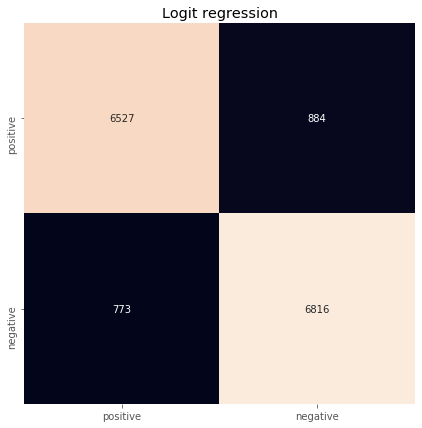

In [25]:
plot_confusion(log_reg_cv.predict(Xval_tfidf), yval, "Logit regression")

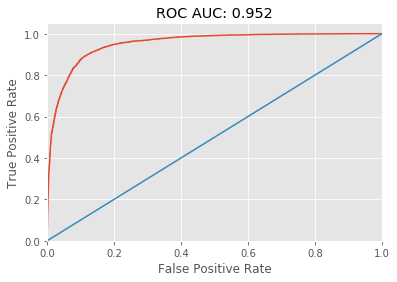

In [26]:
plot_roc_curve(log_reg_cv.predict_proba(Xval_tfidf)[:,1], yval)

## 4.5 Coefficients Visualization

In [31]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=50):
    if (plot_num == 0):
        interesting_coefficients = np.argsort(coef)[-n_top_features:]
    else:
        interesting_coefficients = np.argsort(coef)[0:n_top_features]
    
    plt.figure(figsize=(30, 20))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

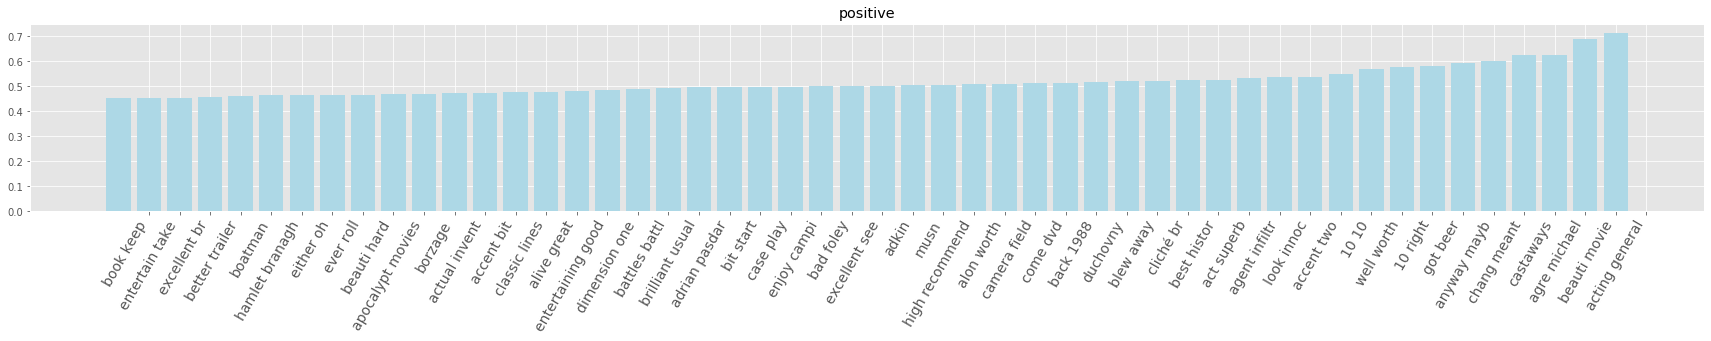

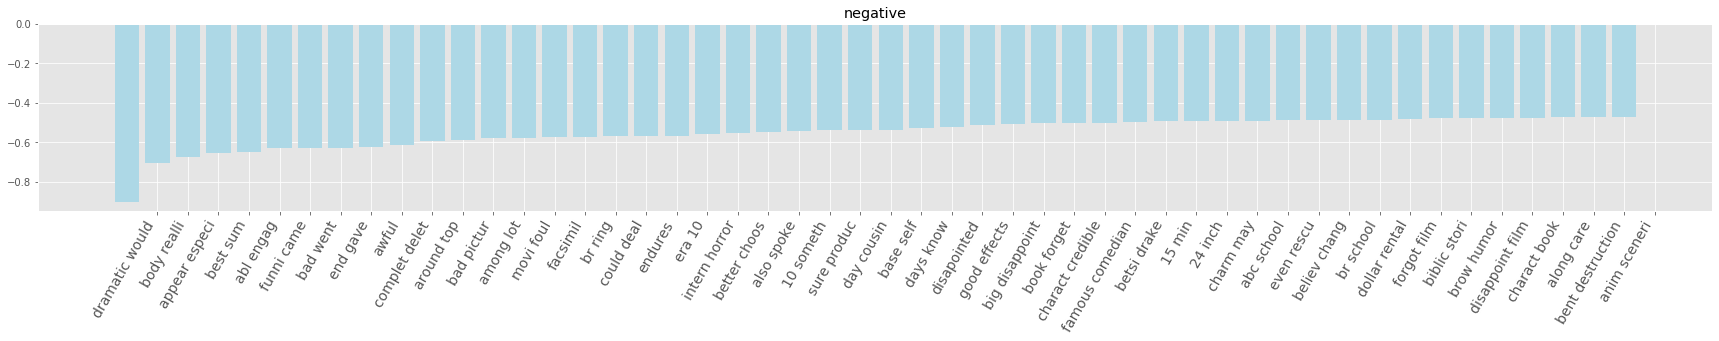

In [32]:
titles = ['positive', 'negative']
for i in range(2):
    visualize_coefficients(log_reg_cv.coef_[0,:], tf_vectorizer.get_feature_names(),
                      title=titles[i], plot_num=i)

# 5. Conclusion

С учетом того, что датасет чистый и сбалансированный, результаты ожидаемо хорошие. 